In [1]:
import numpy as np
from keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import visualkeras

In [2]:
import time
import datetime
import os
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

In [3]:
BATCH_SIZE = 16

In [4]:
#Training data
train_path = 'C:\\Users\\Jovena\\Desktop\\THESIS\\NEW RAW DATA\\training\\train'
#C:\Users\Eliza Marie\Anaconda\train_folder
train_datagen = ImageDataGenerator(rescale=1. / 255)
#change to categorical
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=BATCH_SIZE,
                                         seed=7,
                                         shuffle=True)

Found 1989 images belonging to 3 classes.


In [5]:
path_test = 'C:\\Users\\Jovena\\Desktop\\THESIS\\NEW RAW DATA\\training\\test'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 212 images belonging to 3 classes.


In [6]:
#Validation data
validation_path = 'C:\\Users\\Jovena\\Desktop\\THESIS\\NEW RAW DATA\\training\\validation'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(validation_path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=BATCH_SIZE,
                                         seed=7,
                                         shuffle=True)

Found 212 images belonging to 3 classes.


In [8]:
test_datagen2 = ImageDataGenerator(rescale=1. / 255)
test2 = test_datagen2.flow_from_directory(validation_path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=500,
                                         seed=7,
                                         shuffle=True)

Found 212 images belonging to 3 classes.


In [7]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['kwaw','tamban', 'turingan']

In [9]:
img, label = train.__next__()

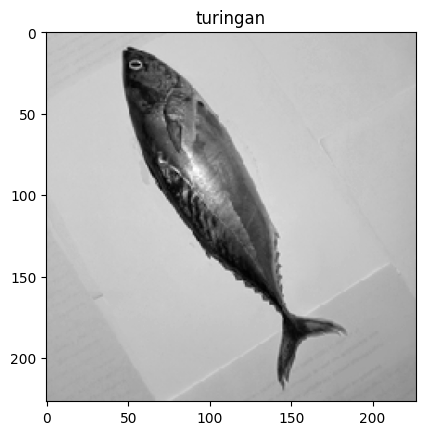

In [10]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [11]:
#
type(train)

keras.preprocessing.image.DirectoryIterator

In [12]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [13]:
# 
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (16, 227, 227, 3)
Batch Size for Output Image :  (16, 3)
Image Size of first image :  (227, 227, 3)
Output of first image :  (3,)


C:\Users\Jovena\AppData\Roaming\Python\Python39\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 1.]')

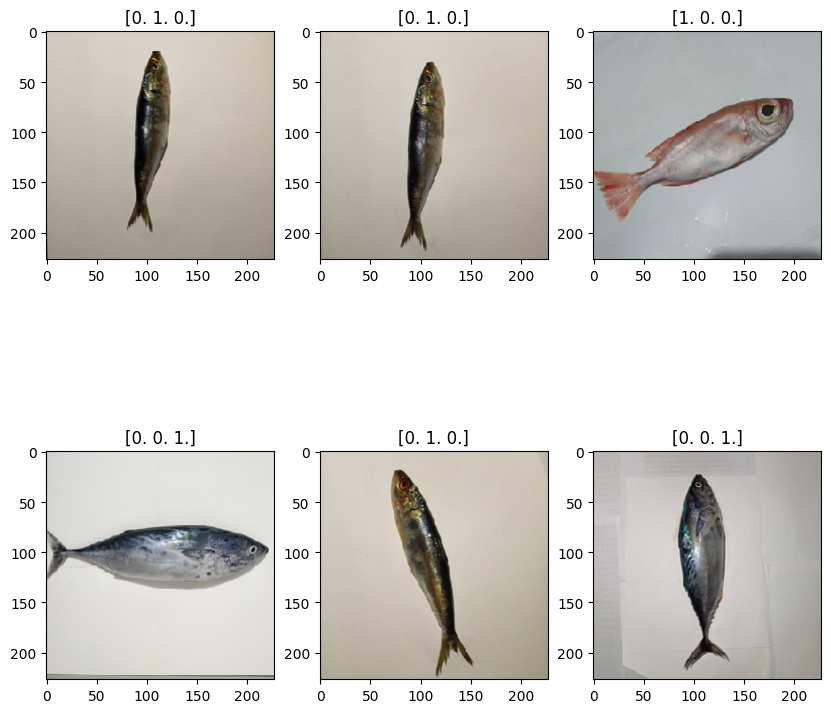

In [14]:
#showing images from training data
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][11])
axs[1][0].set_title(train[0][1][11])
axs[1][1].imshow(train[0][0][15])
axs[1][1].set_title(train[0][1][15])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [15]:
#1 AlexNet function definition
def AlexNet(in_shape):
    X_input = Input(in_shape)
    
    # Initialize model
    alexnet = Sequential()
    
    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), strides = 4,name="conv0", input_shape= in_shape,
        padding='valid', kernel_initializer= 'he_normal'))
    alexnet.add(BatchNormalization(axis = 3 , name = "bn0"))
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3),  padding= 'valid', strides = (2,2),data_format= None, name = 'max0'))
    
    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), strides = 1, padding='same', kernel_initializer= 'he_normal', name = 'conv1'))
    alexnet.add(BatchNormalization(axis = 3 ,name='bn1'))
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3),padding= 'valid', strides = (2,2),data_format= None, name = 'max1'))
    
    
# Layer 3
    alexnet.add(Conv2D(384, (3, 3), strides = 1, padding='same', kernel_initializer= 'he_normal', name='conv2'))
    alexnet.add(BatchNormalization(axis = 3, name = 'bn2'))
    alexnet.add(Activation('relu'))

# Layer 4
    alexnet.add(Conv2D(384, (3, 3), strides = 1, padding='same',kernel_initializer= 'he_normal', name='conv3'))
    alexnet.add(BatchNormalization(axis = 3, name = 'bn3'))
    alexnet.add(Activation('relu'))
    
# Layer 5
    alexnet.add(Conv2D(256, (3, 3), strides = 1, padding='same', kernel_initializer= 'he_normal', name = 'conv4'))
    alexnet.add(BatchNormalization(axis = 3 ,name='bn4'))
    alexnet.add(Activation('softmax'))
    
    alexnet.add(MaxPooling2D(pool_size=(3, 3),padding= 'valid', strides = (2,2),name = 'max2'))
    #alexnet.add(MaxPooling2D(pool_size=(2, 2),padding= 'valid', strides = 2,name = 'max2'))


    alexnet.add(Flatten())

    #alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(4096, activation = 'relu', name = "fc0"))
    #alexnet.add(Dense(1024, activation = 'relu', name = "fc0"))

    alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(4096, activation = 'relu', name = "fc1"))
    #alexnet.add(Dense(1024, activation = 'relu', name = "fc1"))
    
    alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(1000, activation = 'relu'))
    
    alexnet.add(Dense(3, activation = 'softmax', name = "fc2")) #change to softmax later
    
    return alexnet

In [16]:
alexnetModel = AlexNet(train[0][0].shape[1:])

In [17]:
alexnetModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0

In [18]:
from keras import optimizers
sgdm = tf.keras.optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [19]:
alexnetModel.compile(optimizer=sgdm, loss = 'categorical_crossentropy' , 
                     metrics=['accuracy'])
#tf.keras.optimizers.Adam(0.001)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', 
                                patience=3,
                               #min_delta=0.001,
                               mode='min'
                               )

In [21]:
#5
#os.mkdir('./logs4')
#os.mkdir('./logs4/fit')

In [22]:
train_num = train.samples
valid_num = test.samples

In [21]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(path_test):
    num_test_imgs += len(files)

In [22]:
log_dir="./logs4/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback, early_stopping]

# start training
alexnetModel.fit(train,epochs=100, batch_size = BATCH_SIZE,
        #steps_per_epoch=num_train_imgs // BATCH_SIZE,
        validation_data=test,
        #validation_steps=num_test_imgs // BATCH_SIZE,
        callbacks=callback_list,
        #verbose=0,
        validation_freq=1)

Epoch 1/100
125/125 [==============================] - 27s 151ms/step - loss: 0.9858 - accuracy: 0.5540 - val_loss: 0.9779 - val_accuracy: 0.5330
Epoch 2/100
125/125 [==============================] - 12s 93ms/step - loss: 0.7627 - accuracy: 0.6063 - val_loss: 0.8863 - val_accuracy: 0.5330
Epoch 3/100
125/125 [==============================] - 12s 93ms/step - loss: 0.5109 - accuracy: 0.8431 - val_loss: 0.4466 - val_accuracy: 0.8679
Epoch 4/100
125/125 [==============================] - 11s 92ms/step - loss: 0.3267 - accuracy: 0.8743 - val_loss: 0.2167 - val_accuracy: 0.8726
Epoch 5/100
125/125 [==============================] - 12s 93ms/step - loss: 0.2295 - accuracy: 0.8904 - val_loss: 0.1615 - val_accuracy: 0.8726
Epoch 6/100
125/125 [==============================] - 14s 108ms/step - loss: 0.1764 - accuracy: 0.8959 - val_loss: 0.1300 - val_accuracy: 0.8774
Epoch 7/100
125/125 [==============================] - 12s 95ms/step - loss: 0.1405 - accuracy: 0.9422 - val_loss: 0.1053 - val_

In [23]:
alexnetModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0

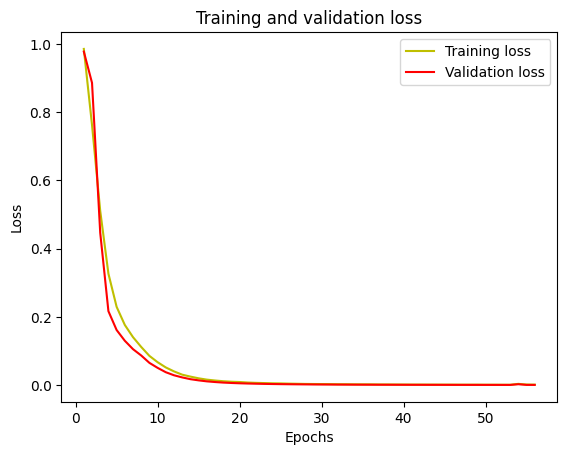

In [24]:
loss = alexnetModel.history.history['loss']
val_loss = alexnetModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
acc = alexnetModel.history.history['accuracy']
#acc = history.history['accuracy']
val_acc = alexnetModel.history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

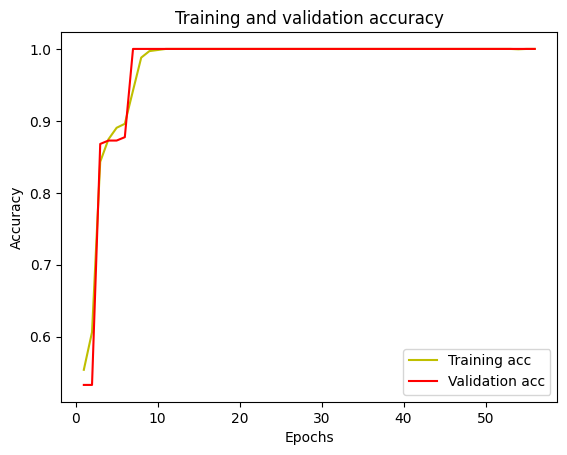

In [26]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
#Generate a batch of images
test_img, test_lbl = test2.__next__()
predictions=alexnetModel.predict(test_img)

In [29]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [30]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  1.0


In [31]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
print(cm)

[[ 27   0   0]
 [  0 113   0]
 [  0   0  72]]


<function matplotlib.pyplot.show(close=None, block=None)>

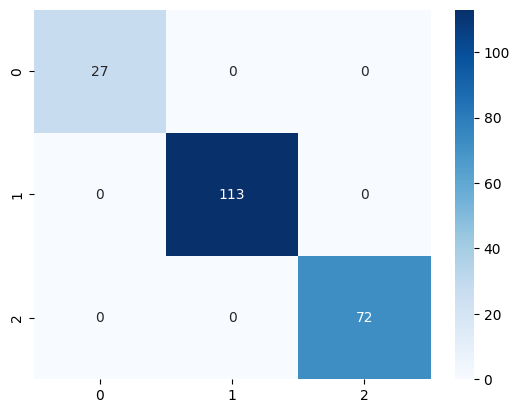

In [32]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show

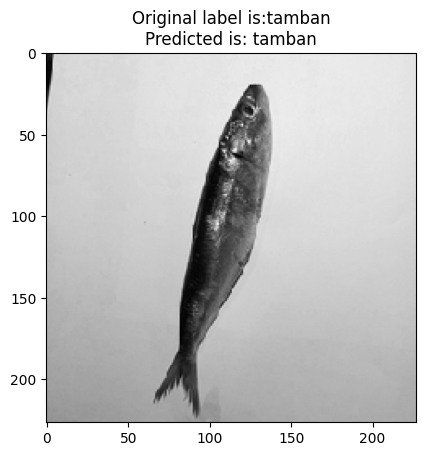

In [33]:
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
#n = 17
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+"\nPredicted is: "+ pred_labl)
plt.show()

In [35]:
#7
alexnetModel.history.history.keys()

dict_keys([])

KeyError: 'loss'

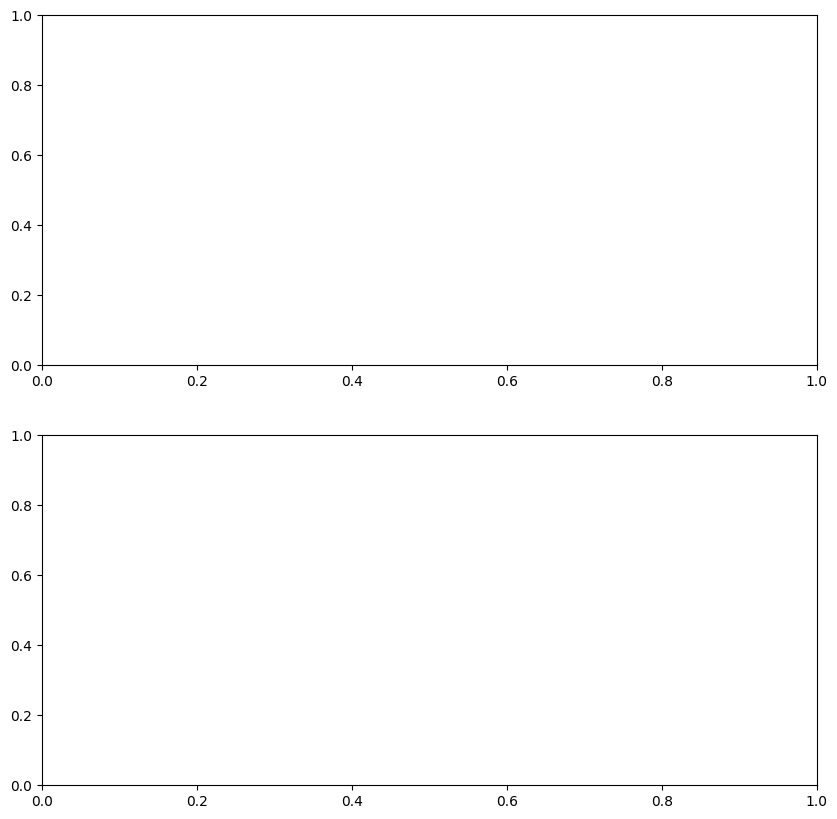

In [36]:
#7
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(alexnetModel.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(alexnetModel.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(alexnetModel.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(alexnetModel.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
print('Accuracy Score = ',np.min(alexnetModel.history.history['val_accuracy']))

In [34]:
predictions = alexnetModel.predict_generator(predict)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


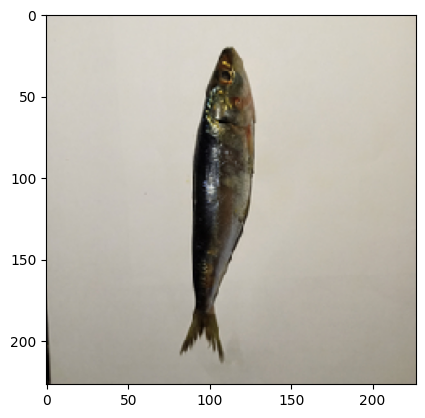

In [35]:
imshow(predict[7][0][0])

In [36]:
values = predictions[7]
#print(predictions[70])
floats = [float(x) for x in values]
print(floats)

[6.85629765939666e-06, 3.382035274057671e-08, 0.999993085861206]


In [37]:
import os 
def get_category(predicted_output):
    path ='C:\\Users\\Jovena\\Desktop\\THESIS\\NEW RAW DATA\\training\\train'
    return os.listdir(path)[np.argmax(predicted_output)]

In [38]:
print(get_category(predictions[7]))

turingan


Text(0.5, 1.0, 'tamban')

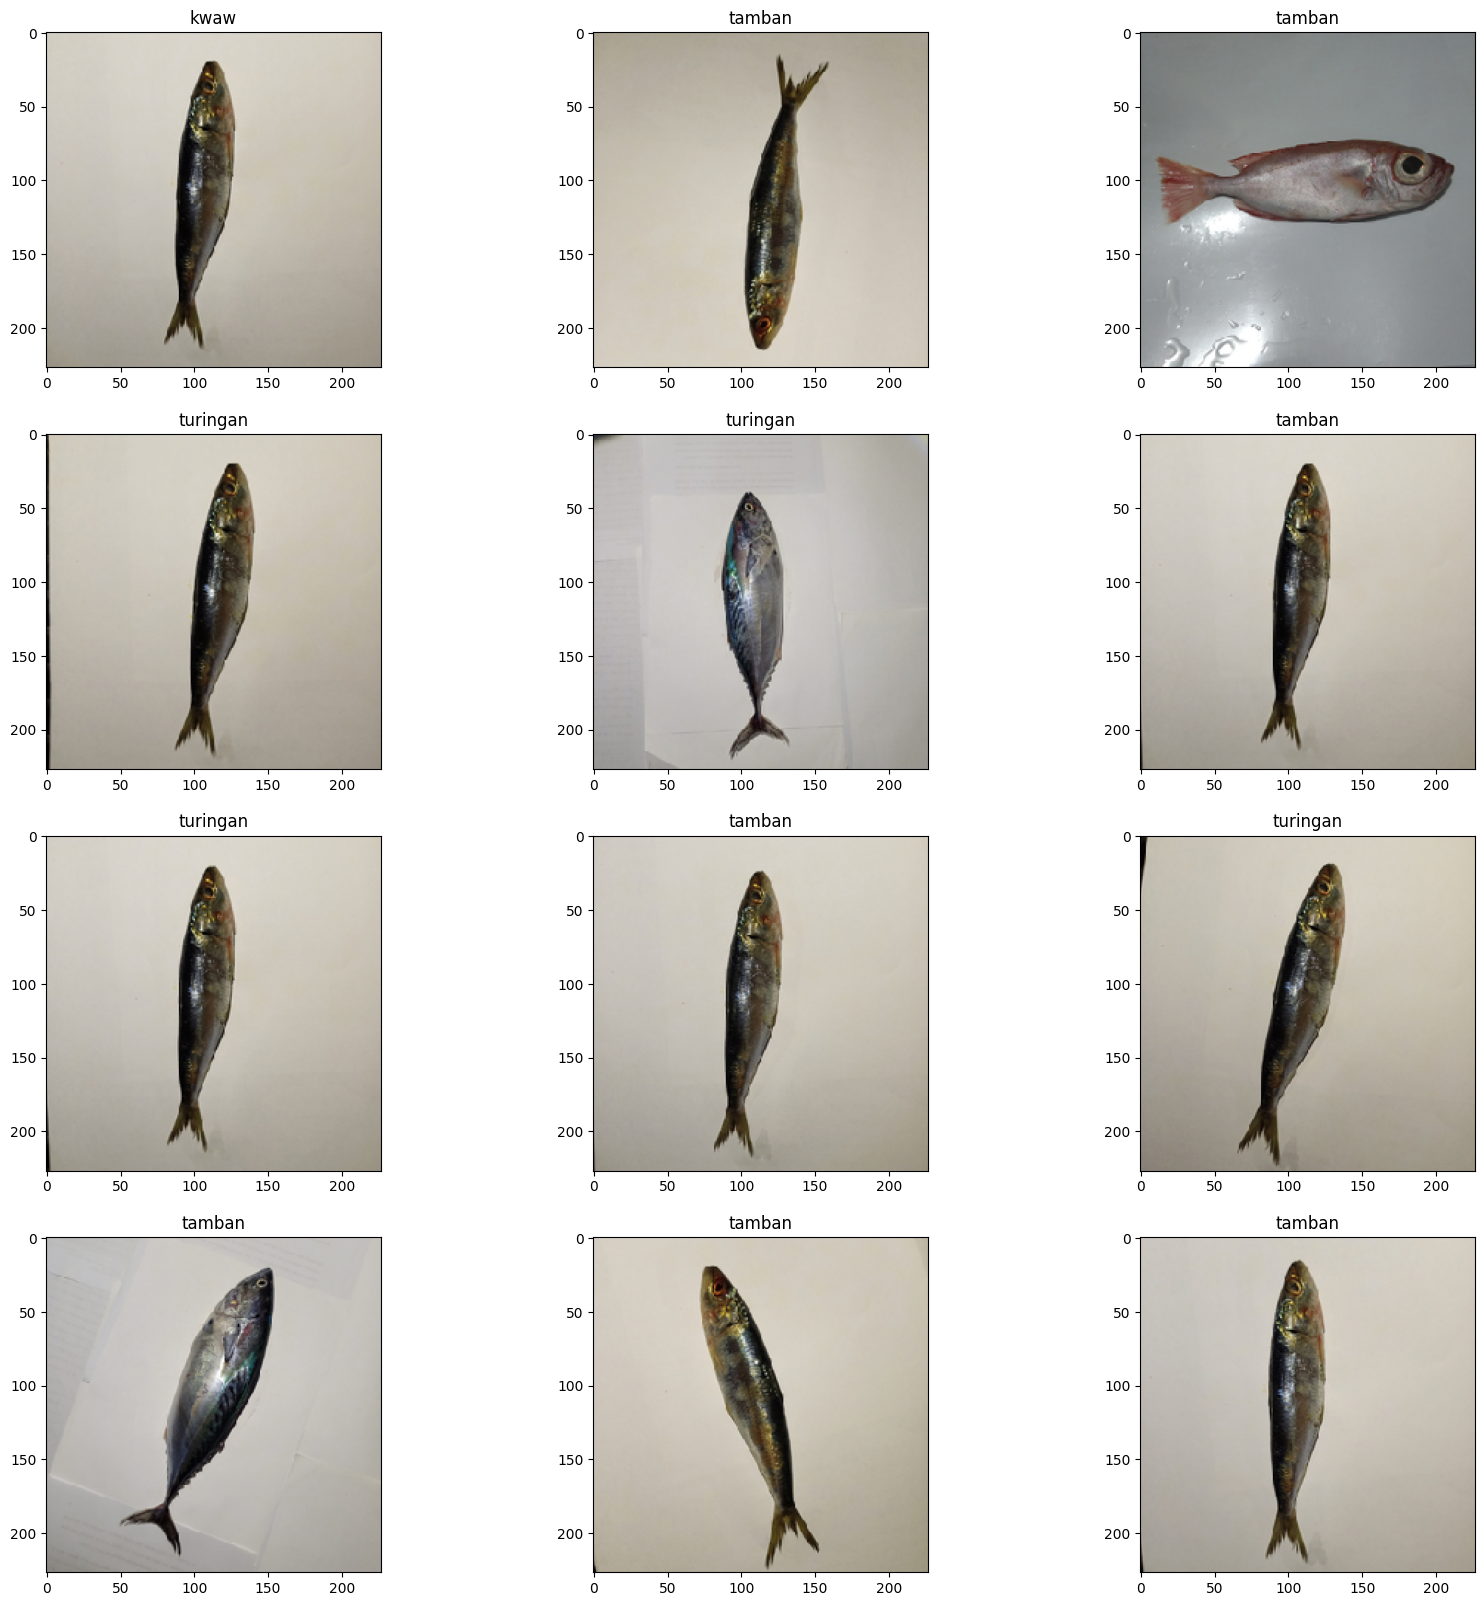

In [39]:
fig , axs = plt.subplots(4,3 ,figsize = (20,20))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))

axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))

axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))

axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))

axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))

axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))

axs[2][0].imshow(predict[7][0][0])
axs[2][0].set_title(get_category(predictions[7]))

axs[2][1].imshow(predict[8][0][0])
axs[2][1].set_title(get_category(predictions[8]))

axs[2][2].imshow(predict[9][0][0])
axs[2][2].set_title(get_category(predictions[9]))

axs[3][0].imshow(predict[10][0][0])
axs[3][0].set_title(get_category(predictions[10]))

axs[3][1].imshow(predict[45][0][0])
axs[3][1].set_title(get_category(predictions[45]))

axs[3][2].imshow(predict[65][0][0])
axs[3][2].set_title(get_category(predictions[65]))

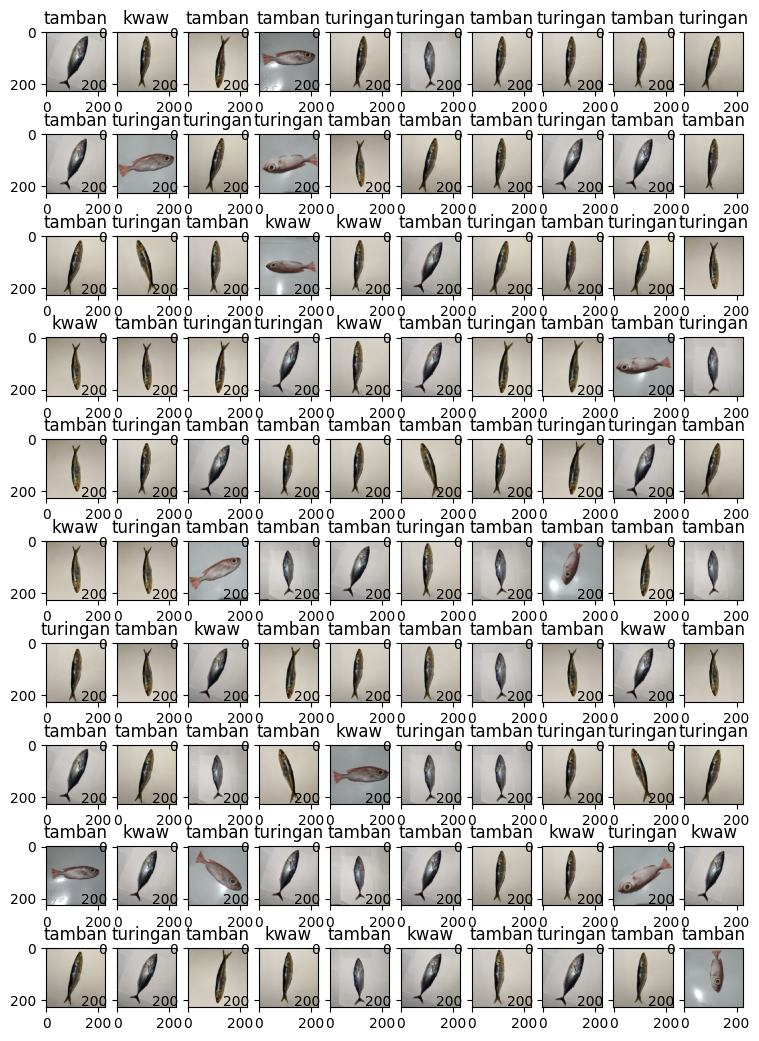

In [40]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
columns = 10
rows = 10

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    #img = np.random.randint(10, size=(h,w))
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(get_category(predictions[i]))  # set title
    plt.imshow(predict[i][0][0])

# do extra plots on selected axes/subplots
# note: index starts with 0
ax[2].plot(xs, 3*ys)
ax[19].plot(ys**2, xs)

plt.show()  # finally, render the plot

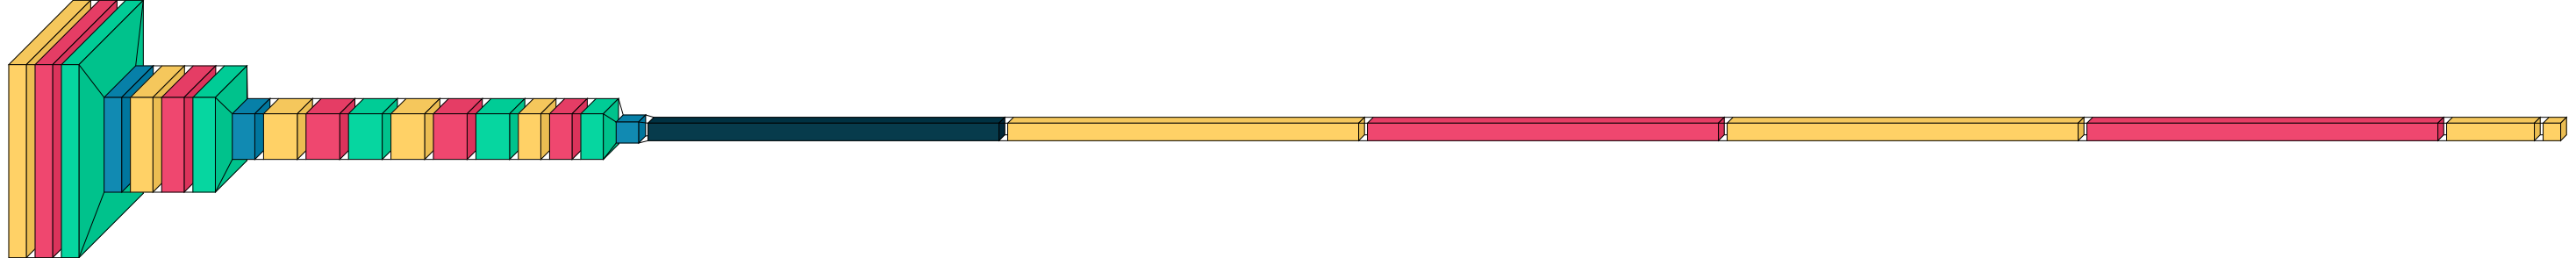

In [41]:
import visualkeras
visualkeras.layered_view(alexnetModel)

In [ ]:
#alexnetModel.save("80-10epochs.model")

In [42]:
#alexnetModel.save('43_5Fish_v1/final')

INFO:tensorflow:Assets written to: 43_5Fish_v1/final\assets


In [43]:
#alexnetModel.save('new_model/43_5Fish_v1.h5')